In [144]:
import seaborn
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import roc_auc_score,roc_curve
from warnings import filterwarnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h1 > 
    <center> Project - Machine Learning
    </center>
</h1>

<h2> 
    <center> Problem 1
    </center>
</h2>

**1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)**

In [145]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [146]:
df=df.drop('Unnamed: 0',axis=1)

In [147]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [149]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [151]:
dup=df.duplicated()
print('Total no. of duplicates values = %d' % (dup.sum()))
df[dup]

Total no. of duplicates values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [152]:
df.shape

(1525, 9)

In [153]:
df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [154]:
df.gender.value_counts()

female    812
male      713
Name: gender, dtype: int64

In [155]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

**1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.**

In [156]:
df_temp = df.drop(["vote","gender"], axis = 1)

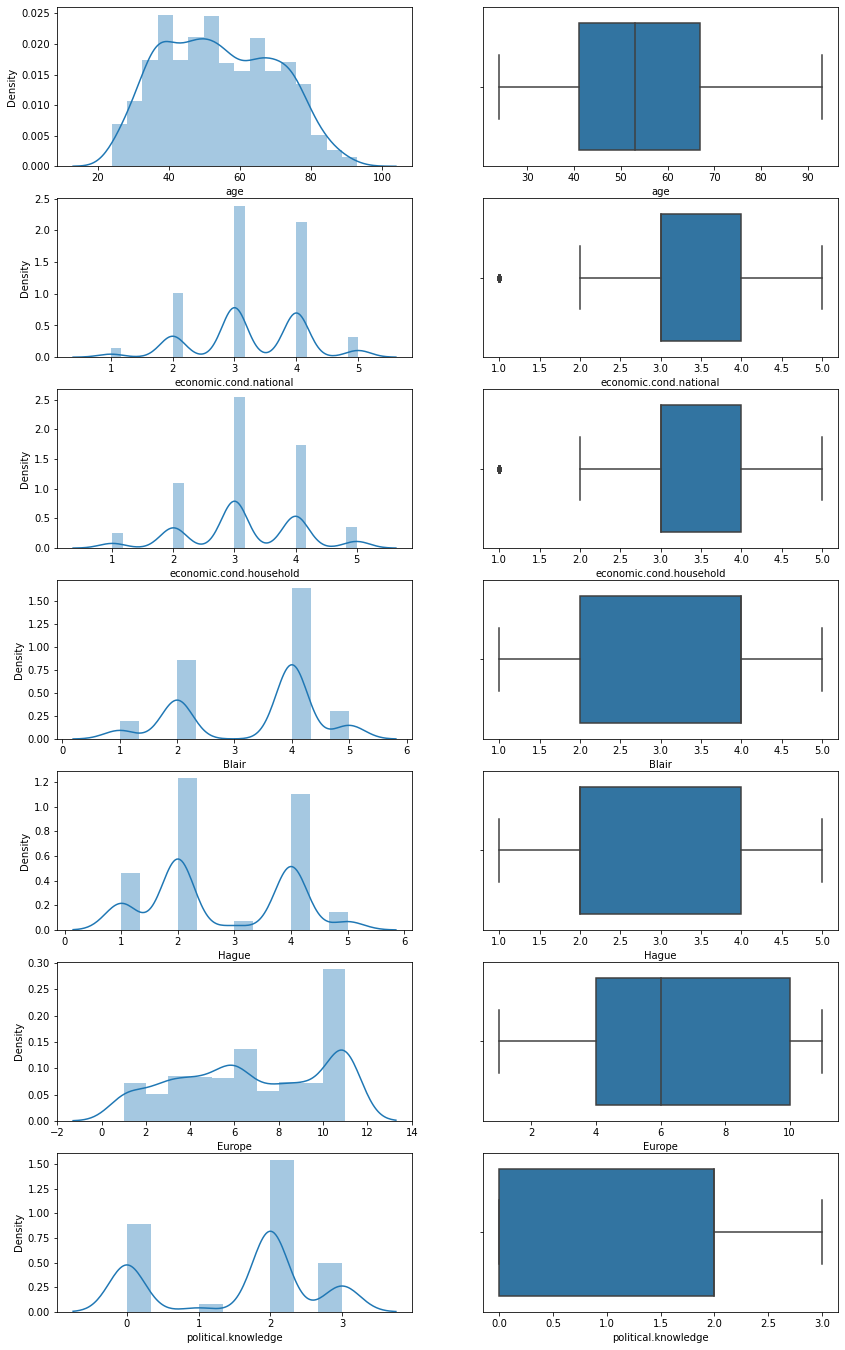

In [157]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(14, 24)
j=0

for i in df_temp.columns:
    a = sns.distplot(df_temp[i], ax=axes[j][0])
    a = sns.boxplot(df_temp[i] , orient = "h" , ax=axes[j][1])
    j=j+1
    
plt.show()

**Multi-Variate Analysis:**

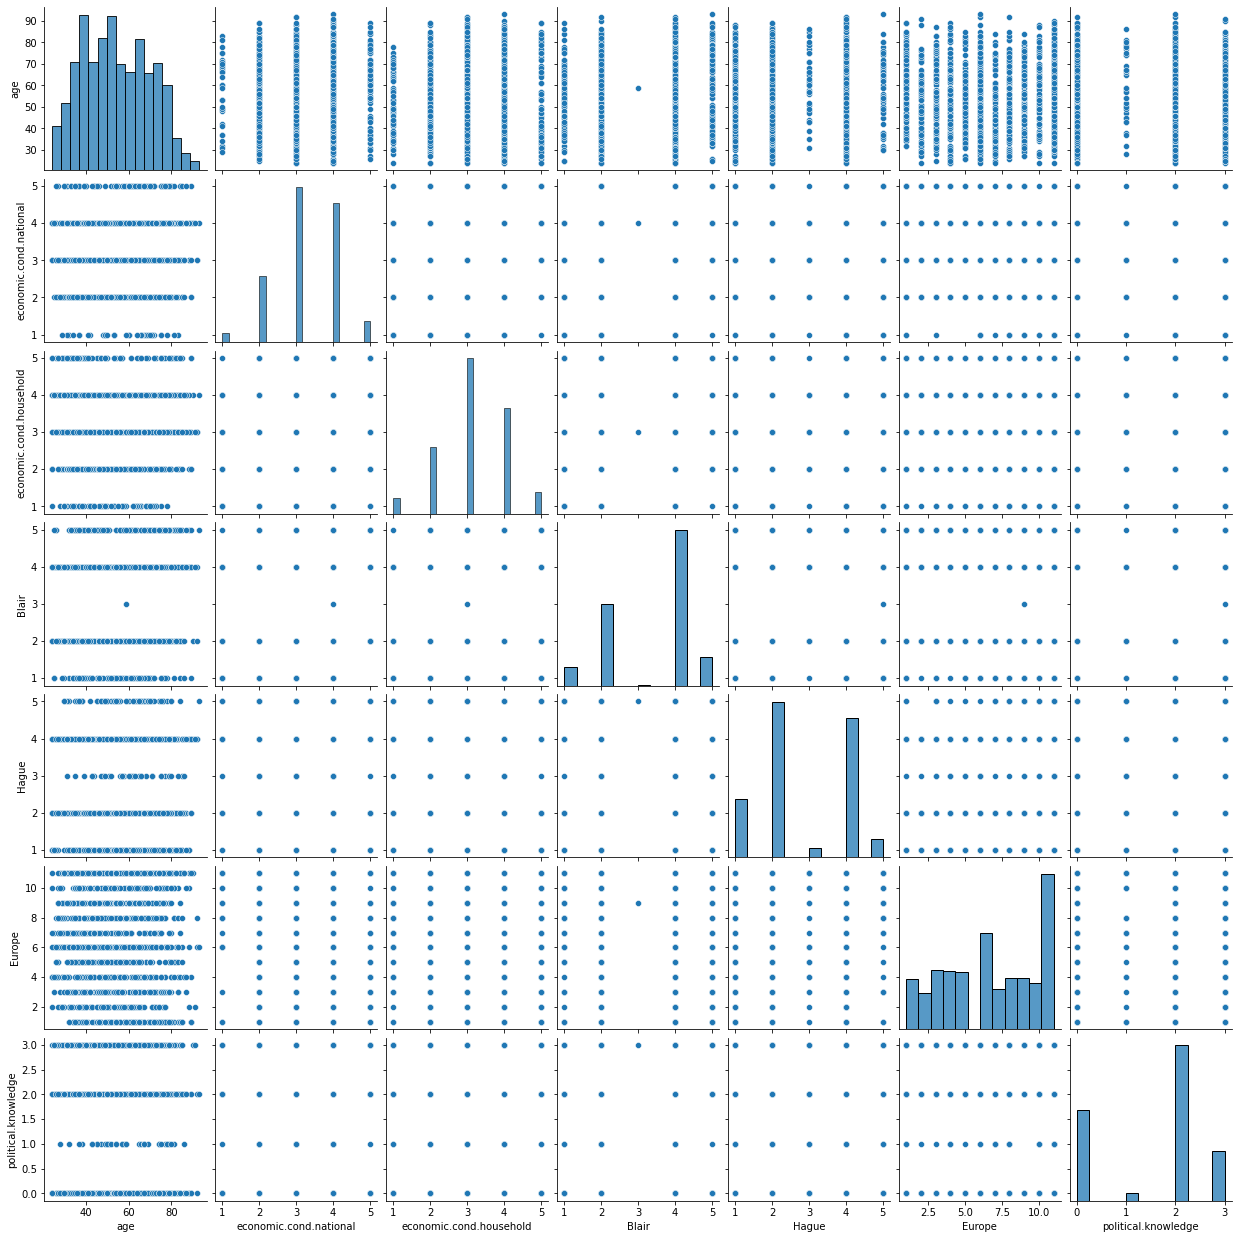

In [158]:
sns.pairplot(df_temp)
plt.show()

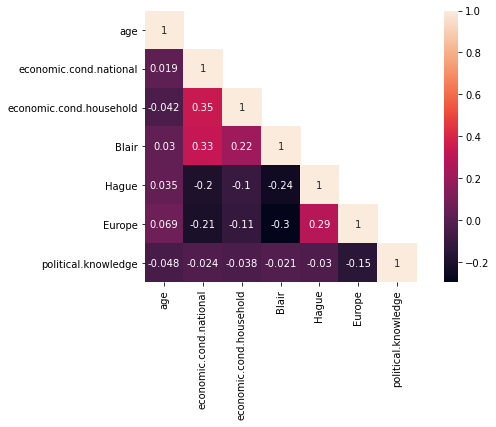

In [159]:
cor = df_temp.corr()
mask = np.array(cor) 
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots() 
fig.set_size_inches(10,5) 
sns.heatmap(cor, mask=mask, vmax=1, square=True,annot=True)
plt.show()

**Outliers:**

In [160]:
Q1 = df_temp.quantile(0.25)

Q3 = df_temp.quantile(0.75)

IQR = Q3 - Q1

pd.DataFrame((((df_temp < (Q1 - 1.5 * IQR)) | (df_temp > (Q3 + 1.5 * IQR))).sum()/df_temp.shape[0]*100),
columns = ['Outlier %'],index=None).round(2)

,Outlier %
age,0.00
economic.cond.national,2.43
economic.cond.household,4.26
Blair,0.00
Hague,0.00
Europe,0.00
political.knowledge,0.00


**1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).**

In [161]:
encode = ['vote','gender']

In [162]:
df=pd.get_dummies(df,columns=encode,drop_first=True)

In [163]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [164]:
X=df.drop('vote_Labour',axis=1)
Y=df['vote_Labour']

In [165]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.70,random_state=1)

In [166]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1453,62,3,3,2,2,11,2,0
275,49,3,3,2,2,8,0,0
1130,74,4,4,4,4,7,0,1
1153,57,2,3,4,2,6,2,0
1172,24,4,5,4,4,6,0,1


**1.4 & 1.7 Apply Logistic Regression and LDA (linear discriminant analysis).**

**Logistic Regression**

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
lr_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lr_model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

**Performance Metrics on Train Data:**

In [169]:
y_train_predict=lr_model.predict(X_train)
lr_model_score=lr_model.score(X_train,Y_train)
print(lr_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8406747891283973
[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



AUC: 0.889


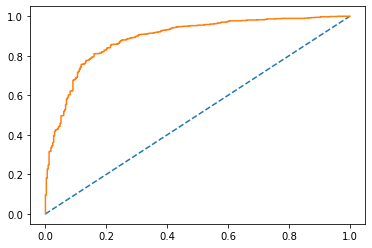

In [170]:
# predict probabilities
probs = lr_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

**Performance Metrics on Test Data:**

In [171]:
y_test_predict=lr_model.predict(X_test)
lr_model_score=lr_model.score(X_test,Y_test)
print(lr_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.882


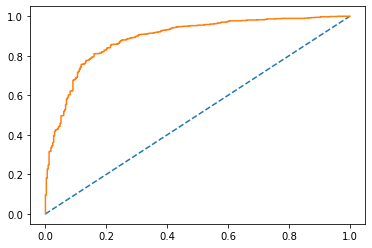

In [172]:
probs_test = lr_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

**LDA**

In [173]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [174]:
lda_model=LinearDiscriminantAnalysis()
lda_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

**Performance Metrics on Train Data:**

In [175]:
y_train_predict=LDA_model.predict(X_train)
lda_model_score=LDA_model.score(X_train,Y_train)
print(lda_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8369259606373008
[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



the auc 0.889 


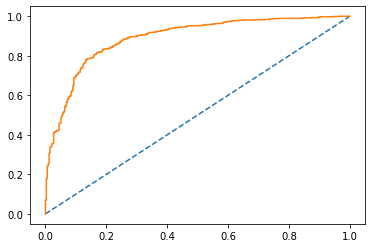

In [176]:
probs_train=lda_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

**Performance Metrics on Test Data:**

In [177]:
y_test_predict=lda_model.predict(X_test)
lda_model_score=lda_model.score(X_test,Y_test)
print(lda_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



the auc curve 0.884 


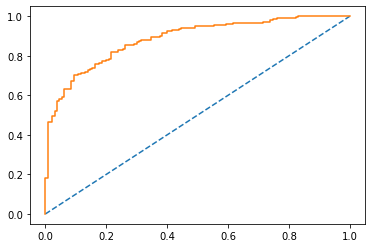

In [178]:
probs_test=lda_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

**1.5 & 1.7 Apply KNN Model and Naïve Bayes Model. Interpret the results.**

KNN Model:

In [179]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [180]:
y_train_predict=KNN_model.predict(X_train)
KNN_model_score=KNN_model.score(X_train,Y_train)

**Performance Metrics on Train Data:**

In [181]:
print(KNN_model_score)

0.8537956888472352


In [182]:
print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

[[242  90]
 [ 66 669]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.85      0.85      1067



the auc 0.921 


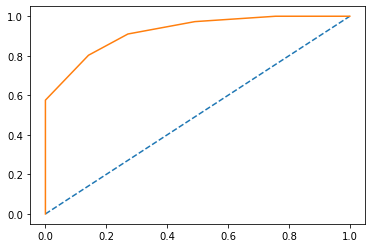

In [183]:
probs_train=KNN_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

**Performance Metrics on Test Data:**

In [184]:
y_test_predict=KNN_model.predict(X_test)

KNN_model_score=KNN_model.score(X_test, Y_test)

print(KNN_model_score)

0.7860262008733624


In [185]:
print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

[[ 81  49]
 [ 49 279]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       130
           1       0.85      0.85      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



the auc curve 0.835 


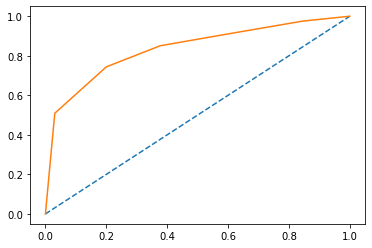

In [186]:
probs_test=KNN_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

**Naïve Bayes Model:**

In [187]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [188]:
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

**Performance Metrics on Train Data:**

In [189]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, Y_train)
print(model_score)

0.8331771321462043


In [190]:
print(metrics.confusion_matrix(Y_train,Y_train_predict))
print(metrics.classification_report(Y_train,Y_train_predict))

[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



the auc 0.886 


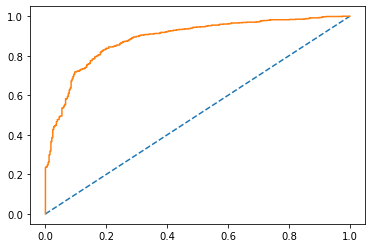

In [191]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

**Performance Metrics on Test Data:**

In [192]:
y_test_predict=NB_model.predict(X_test)

NB_model_score=NB_model.score(X_test, Y_test)

print(NB_model_score)

0.8253275109170306


In [193]:
print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



the auc curve 0.885 


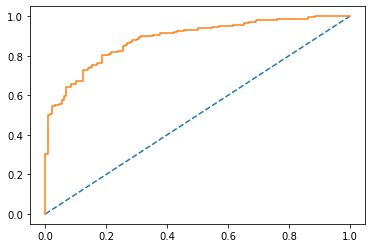

In [194]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

**1.6 & 1.7 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.**

**Bagging:**

In [195]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [196]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=1)

In [197]:
DTM=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=DTM,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

**Performance Metrics on Train Data:**

In [198]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,Y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



AUC: 1.000


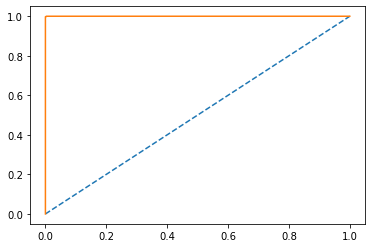

In [199]:
probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

**Performance Metrics on Test Data:**

In [200]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.7969432314410481
[[ 83  47]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



AUC: 0.877


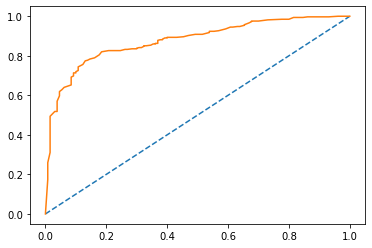

In [201]:
probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

**Boosting**

In [202]:
from sklearn.ensemble import AdaBoostClassifier

In [203]:
ADB=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

**Performance Metrics on Train Data:**

In [204]:
y_train_predict=ADB.predict(X_train)
ADB_score=ADB.score(X_train,Y_train)
print(ADB_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



AUC: 0.913


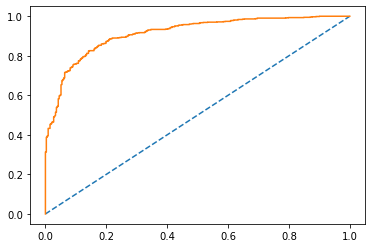

In [205]:
probs = ADB.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

**Performance Metrics on Test Data:**

In [206]:
y_test_predict = ADB.predict(X_test)
ADB_score = ADB.score(X_test, Y_test)
print(ADB_score)
print(metrics.confusion_matrix(Y_test, y_test_predict))
print(metrics.classification_report(Y_test, y_test_predict))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.879


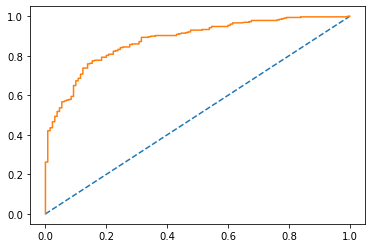

In [207]:
probs_test = ADB.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

<h2> 
    <center> Problem 2
    </center>
</h2>

In [123]:
!pip install textstat
!pip install wordcloud
import textstat
import nltk
import string
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package punkt to C:\Users\Yash
[nltk_data]     Joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to C:\Users\Yash
[nltk_data]     Joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


**2.1 Find the number of characters, words, and sentences for the mentioned documents.**

**Roosevelt:**

In [124]:
print("Num sentences:", textstat.sentence_count(Roosevelt))
print("Num chars:", textstat.char_count(Roosevelt))
print("Num words:", len(Roosevelt.split()))

Num sentences: 31
Num chars: 6249
Num words: 1360


**Kennedy:**

In [125]:
print("Num sentences:", textstat.sentence_count(Kennedy))
print("Num chars:", textstat.char_count(Kennedy))
print("Num words:", len(Kennedy.split()))

Num sentences: 27
Num chars: 6255
Num words: 1390


**Nixon:**

In [126]:
print("Num sentences:", textstat.sentence_count(Nixon))
print("Num chars:", textstat.char_count(Nixon))
print("Num words:", len(Nixon.split()))

Num sentences: 21
Num chars: 8223
Num words: 1819


**2.2 Remove all the stopwords from all three speeches.**

In [128]:
Roosevelt_tokens = word_tokenize(Roosevelt)
Kennedy_tokens = word_tokenize(Kennedy)
Nixon_tokens = word_tokenize(Nixon)

In [129]:
from nltk.corpus import stopwords

In [130]:
stop_words = set(stopwords.words('english'))|set(string.punctuation)|set(['--'])

Roosevelt_tokens_filtered = [w for w in Roosevelt_tokens if not w.lower() in stop_words]
Kennedy_tokens_filtered = [w for w in Kennedy_tokens if not w.lower() in stop_words]
Nixon_tokens_filtered = [w for w in Nixon_tokens if not w.lower() in stop_words]

In [142]:
Roosevelt_tokens_filtered

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'United',
 'States',
 'Washington',
 "'s",
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'Lincoln',
 "'s",
 'day',
 'task',
 'people',
 'preserve',
 'Nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'Nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'Lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three-score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'Government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',


**2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words.**

In [131]:
all_words_freq = nltk.FreqDist(Roosevelt_tokens_filtered)
word_features = [item[0] for item in all_words_freq.most_common(3)]
word_features

['know', 'spirit', 'life']

In [132]:
all_words_freq = nltk.FreqDist(Kennedy_tokens_filtered)
word_features = [item[0] for item in all_words_freq.most_common(3)]
word_features

['us', 'world', 'Let']

In [133]:
all_words_freq = nltk.FreqDist(Nixon_tokens_filtered)
word_features = [item[0] for item in all_words_freq.most_common(3)]
word_features

['us', 'America', 'peace']

**2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)**

**Roosevelt:**


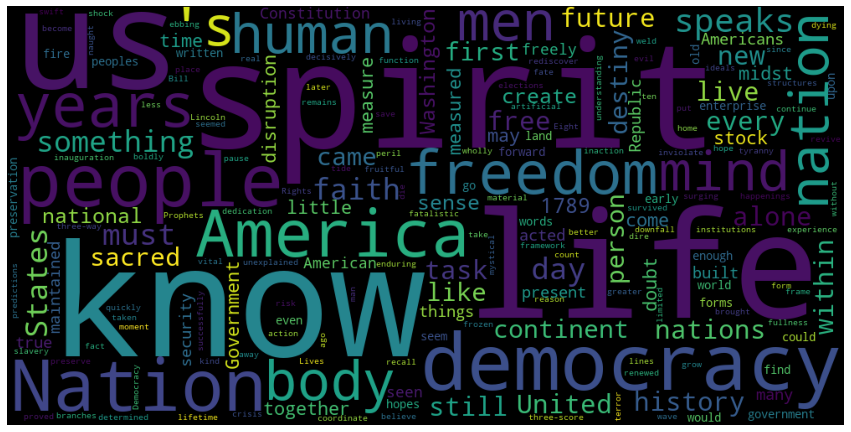

In [134]:
from collections import Counter
word_could_dict=Counter(Roosevelt_tokens_filtered)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

**Kennedy:**

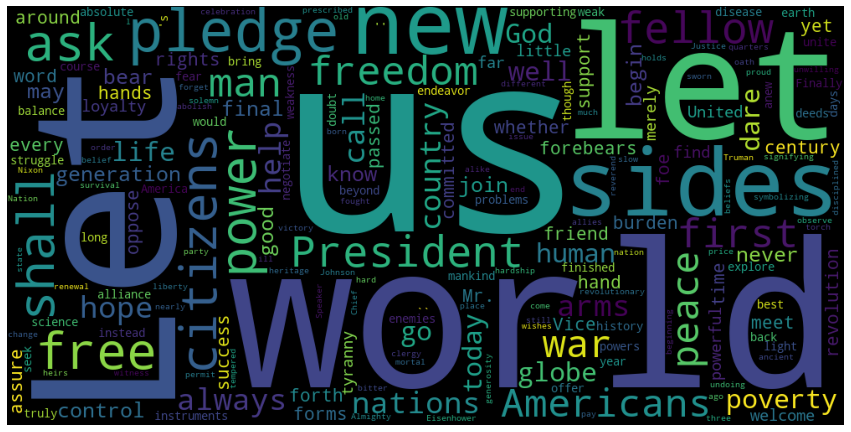

In [136]:
from collections import Counter
word_could_dict=Counter(Kennedy_tokens_filtered)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

**Nixon:**

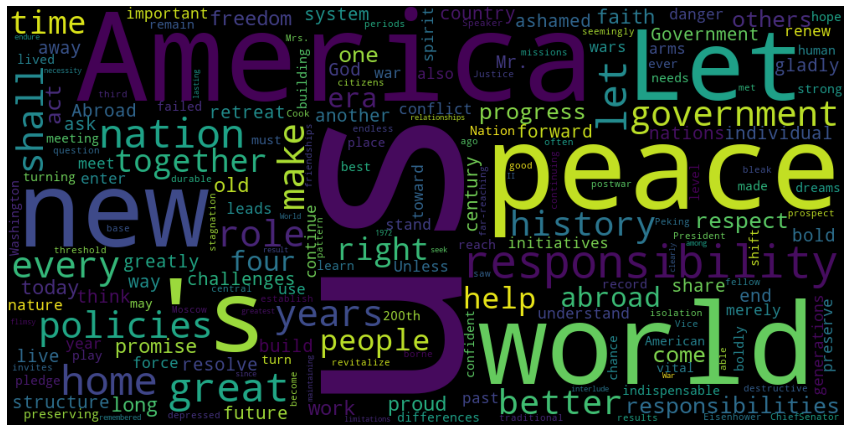

In [138]:
from collections import Counter
word_could_dict=Counter(Nixon_tokens_filtered)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()